In [1]:
import pandas as pd

In [16]:
import json

df = pd.read_csv('data/raw_edinburgh_properties.csv')
# Parse the transactions string as a JSON string
df['transactions'] = df['transactions'].apply(lambda x: json.loads(x) if x else None)

df.head()



,address,propertyType,bedrooms,hasFloorPlan,transactions,detailUrl,imageInfo.imageUrl,imageInfo.mediumImageUrl,imageInfo.count,location.lat,location.lng,imageInfo
0,"4/1, Northview Court, Edinburgh, Midlothian EH...",NaN,2.0,False,"[{'displayPrice': '£79,023', 'dateSold': '2024...",https://www.rightmove.co.uk/house-prices/detai...,https://media.rightmove.co.uk/dir/53k/52259/58...,https://media.rightmove.co.uk/dir/53k/52259/58...,13.0,55.97288,-3.25183,NaN
1,"77, Easter Drylaw Place, Edinburgh, Midlothian...",NaN,2.0,True,"[{'displayPrice': '£239,250', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,https://media.rightmove.co.uk/dir/253k/252134/...,https://media.rightmove.co.uk/dir/253k/252134/...,15.0,55.96591,-3.24856,NaN
2,"678, Ferry Road, Edinburgh, Midlothian EH4 4AQ",NaN,NaN,False,"[{'displayPrice': '£200,000', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,NaN,NaN,NaN,55.96821,-3.24335,NaN
3,"4, Muirhouse Green, Edinburgh, Midlothian EH4 4PQ",NaN,NaN,False,"[{'displayPrice': '£325,995', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,NaN,NaN,NaN,55.96713,-3.25228,NaN
4,"7, Drylaw House Gardens, Edinburgh, Midlothian...",NaN,1.0,True,"[{'displayPrice': '£163,000', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,https://media.rightmove.co.uk/dir/253k/252134/...,https://media.rightmove.co.uk/dir/253k/252134/...,14.0,55.96390,-3.25170,NaN


In [19]:
from datetime import datetime

# Extract the latest price and date sold
df['latest_price'] = df['transactions'].apply(lambda x: x[-1]['displayPrice'] if x else None)
df['latest_date_sold'] = df['transactions'].apply(lambda x: x[-1]['dateSold'] if x else None)

# Convert latest_price to numeric by removing non-numeric characters and converting to float
df['latest_price'] = df['latest_price'].str.replace('£', '').str.replace(',', '').astype(float)
df['latest_date_sold'] = pd.to_datetime(df['latest_date_sold'])

# Calculate yearly growth if multiple prices exist
def calculate_yearly_growth(transactions):
  if len(transactions) < 2:
    return 0
  prices = [float(t['displayPrice'].replace('£', '').replace(',', '')) for t in transactions]
  dates = [datetime.fromisoformat(t['dateSold']) for t in transactions]
  if prices[0] == 0 or (dates[-1] - dates[0]).days == 0:
    return 0
  growth = (prices[-1] - prices[0]) / prices[0] / ((dates[-1] - dates[0]).days / 365.25)
  return growth

df['yearly_growth'] = df['transactions'].apply(calculate_yearly_growth)

df.head()

,address,propertyType,bedrooms,hasFloorPlan,transactions,detailUrl,imageInfo.imageUrl,imageInfo.mediumImageUrl,imageInfo.count,location.lat,location.lng,imageInfo,latest_price,latest_date_sold,yearly_growth
0,"4/1, Northview Court, Edinburgh, Midlothian EH...",NaN,2.0,False,"[{'displayPrice': '£79,023', 'dateSold': '2024...",https://www.rightmove.co.uk/house-prices/detai...,https://media.rightmove.co.uk/dir/53k/52259/58...,https://media.rightmove.co.uk/dir/53k/52259/58...,13.0,55.97288,-3.25183,NaN,35000.0,2004-08-25,0.027493
1,"77, Easter Drylaw Place, Edinburgh, Midlothian...",NaN,2.0,True,"[{'displayPrice': '£239,250', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,https://media.rightmove.co.uk/dir/253k/252134/...,https://media.rightmove.co.uk/dir/253k/252134/...,15.0,55.96591,-3.24856,NaN,239250.0,2024-11-26,0.000000
2,"678, Ferry Road, Edinburgh, Midlothian EH4 4AQ",NaN,NaN,False,"[{'displayPrice': '£200,000', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,NaN,NaN,NaN,55.96821,-3.24335,NaN,110000.0,2007-11-28,0.026493
3,"4, Muirhouse Green, Edinburgh, Midlothian EH4 4PQ",NaN,NaN,False,"[{'displayPrice': '£325,995', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,NaN,NaN,NaN,55.96713,-3.25228,NaN,325995.0,2024-11-22,0.000000
4,"7, Drylaw House Gardens, Edinburgh, Midlothian...",NaN,1.0,True,"[{'displayPrice': '£163,000', 'dateSold': '202...",https://www.rightmove.co.uk/house-prices/detai...,https://media.rightmove.co.uk/dir/253k/252134/...,https://media.rightmove.co.uk/dir/253k/252134/...,14.0,55.96390,-3.25170,NaN,120000.0,2017-11-23,0.037727


## Cluster Analysis



In [20]:
from sklearn.cluster import KMeans
import numpy as np
import folium

# Extract latitude and longitude from the postcodes
coords = df[['location.lat', 'location.lng']].values


# Perform KMeans clustering to group the postcodes into 15 clusters
kmeans = KMeans(n_clusters=20, random_state=0).fit(coords)

# Find the postcode in the middle of each cluster
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

df['cluster'] = cluster_labels
df['cluster_center_lat'] = df['cluster'].apply(lambda x: cluster_centers[x][0])
df['cluster_center_lng'] = df['cluster'].apply(lambda x: cluster_centers[x][1])
df['latest_year_sold'] = df['latest_date_sold'].dt.year

grouped = df.groupby(['cluster', 'cluster_center_lat', 'cluster_center_lng', 'latest_year_sold'])

grouped

In [21]:
# Define the numeric columns
numeric_columns = ['bedrooms', 'latest_price', 'yearly_growth']

# Aggregate key statistics for each numeric column for each group
agg_stats = grouped[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max'])

# Flatten the MultiIndex columns
agg_stats.columns = ['_'.join(col).strip() for col in agg_stats.columns.values]

# Display the aggregated statistics
agg_stats.reset_index(inplace=True)
agg_stats

,cluster,cluster_center_lat,cluster_center_lng,latest_year_sold,bedrooms_mean,bedrooms_median,bedrooms_std,bedrooms_min,bedrooms_max,latest_price_mean,latest_price_median,latest_price_std,latest_price_min,latest_price_max,yearly_growth_mean,yearly_growth_median,yearly_growth_std,yearly_growth_min,yearly_growth_max
0,0,55.932012,-3.164031,2000,3.000000,3.0,2.000000,1.0,5.0,120674.000000,128128.0,70524.118881,41440.0,185000.0,0.038663,0.034031,0.014718,0.026857,0.059735
1,0,55.932012,-3.164031,2001,2.000000,2.0,0.000000,2.0,2.0,130841.300000,89506.5,133078.368019,56500.0,505000.0,0.034781,0.032892,0.007051,0.027413,0.047681
2,0,55.932012,-3.164031,2002,2.514286,2.0,1.067472,1.0,6.0,151919.753425,133000.0,95954.060076,14100.0,473500.0,0.032638,0.032050,0.008543,0.001981,0.060210
3,0,55.932012,-3.164031,2003,2.676471,2.0,1.199004,1.0,5.0,165113.046875,136500.0,146316.702782,15500.0,695000.0,0.025397,0.029602,0.060395,-0.435041,0.100252
4,0,55.932012,-3.164031,2004,2.857143,2.0,1.375048,1.0,6.0,214500.262295,163500.0,177235.524057,7000.0,855000.0,0.027708,0.023918,0.017171,0.006970,0.104483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,19,55.957830,-3.186033,2020,1.714286,2.0,0.611250,1.0,3.0,281180.093750,281625.0,80581.424496,140000.0,500000.0,0.031680,0.000000,0.049581,0.000000,0.197278
496,19,55.957830,-3.186033,2021,1.785714,2.0,0.568112,1.0,3.0,309111.974026,280000.0,122288.831395,135000.0,765000.0,0.015116,0.000000,0.065346,-0.135766,0.505974
497,19,55.957830,-3.186033,2022,2.122449,2.0,1.053420,0.0,5.0,426440.642384,360000.0,305097.721308,125000.0,2350000.0,0.003054,0.000000,0.039487,-0.325341,0.288406
498,19,55.957830,-3.186033,2023,2.089109,2.0,1.068635,0.0,5.0,371349.587156,305000.0,224407.330332,45000.0,1480000.0,0.002654,0.000000,0.035106,-0.044968,0.473223


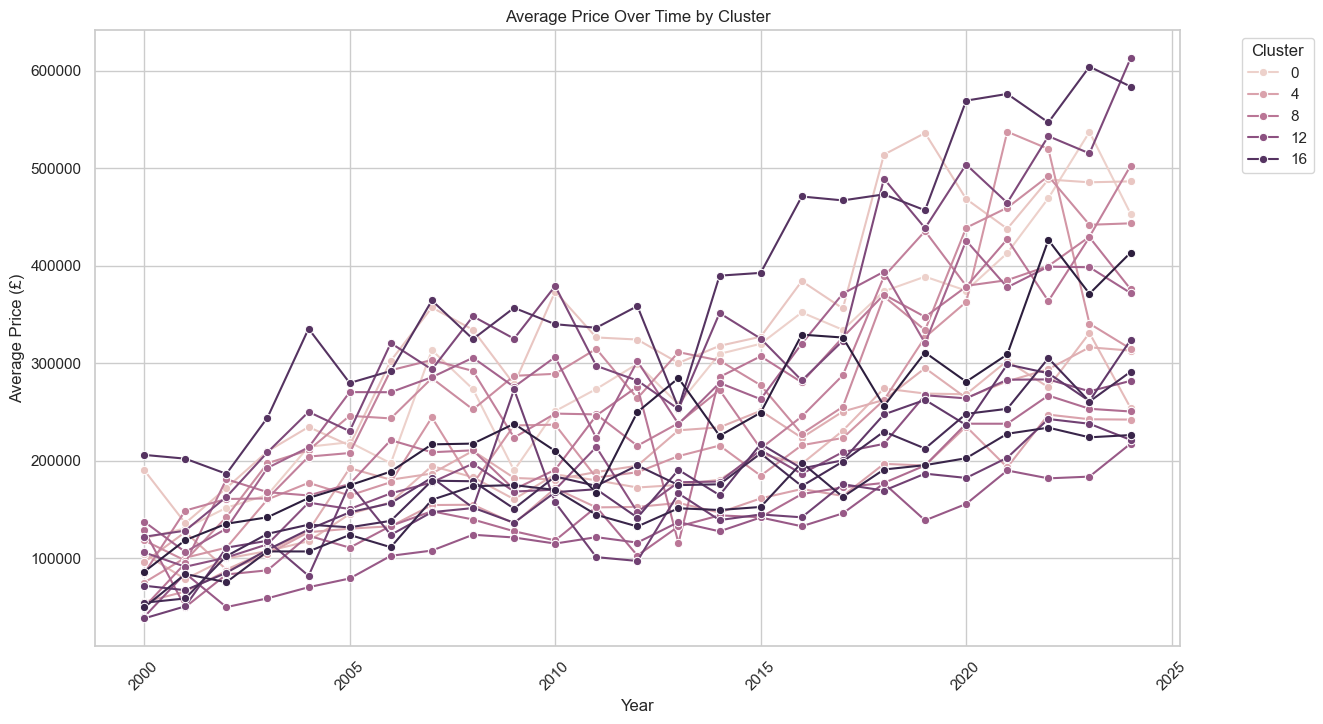

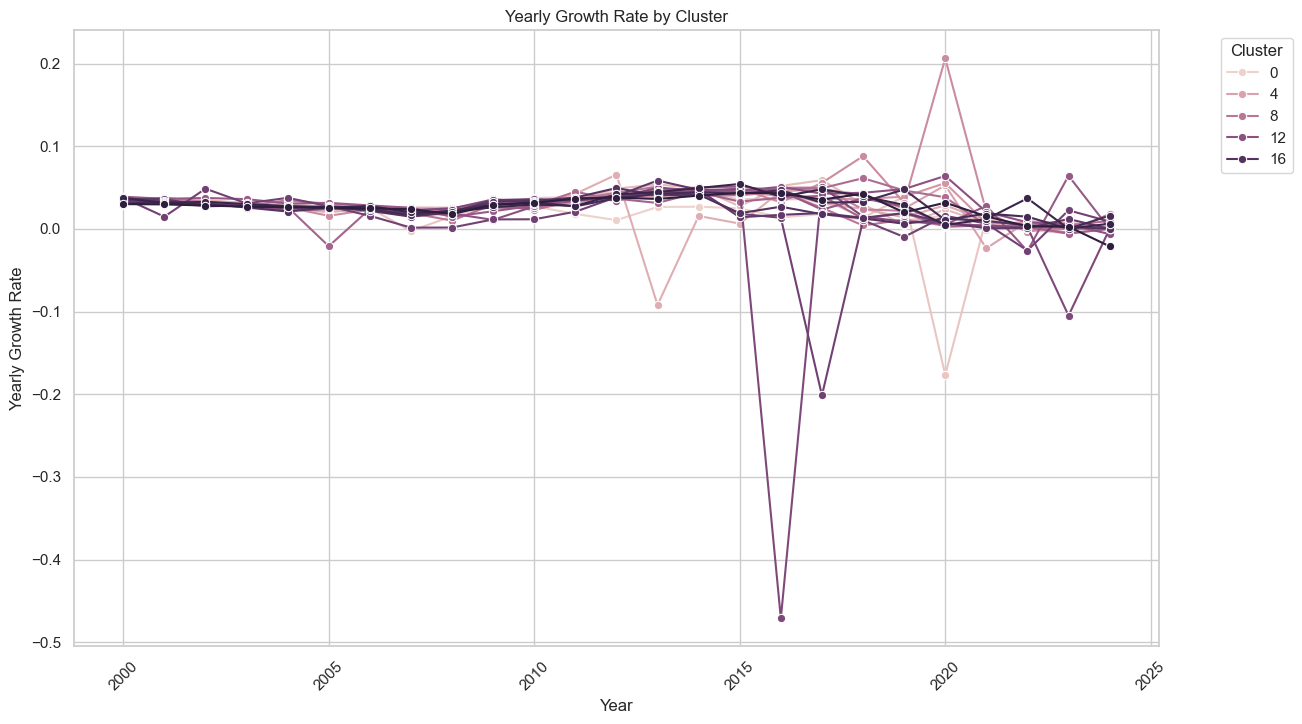

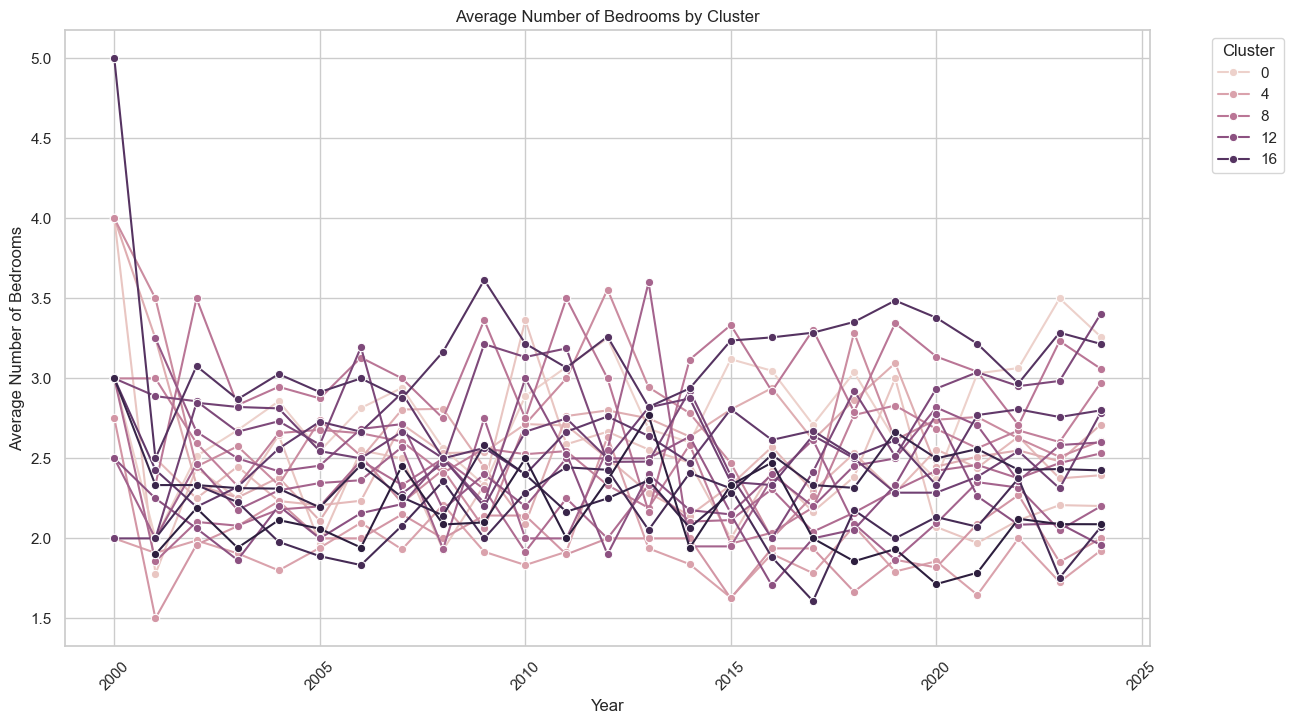

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Average Price Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=agg_stats, x='latest_year_sold', y='latest_price_mean', hue='cluster', marker='o')
plt.title('Average Price Over Time by Cluster')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# 2. Yearly Growth Rate
plt.figure(figsize=(14, 8))
sns.lineplot(data=agg_stats, x='latest_year_sold', y='yearly_growth_mean', hue='cluster', marker='o')
plt.title('Yearly Growth Rate by Cluster')
plt.xlabel('Year')
plt.ylabel('Yearly Growth Rate')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# 3. Average Number of Bedrooms
plt.figure(figsize=(14, 8))
sns.lineplot(data=agg_stats, x='latest_year_sold', y='bedrooms_mean', hue='cluster', marker='o')
plt.title('Average Number of Bedrooms by Cluster')
plt.xlabel('Year')
plt.ylabel('Average Number of Bedrooms')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Map Views

In [23]:
import folium
from folium.plugins import HeatMap

def create_heatmap(df: pd.DataFrame, column: str) -> HeatMap:
  # Create a map centered around Edinburgh
  map_center = [55.9533, -3.1883]
  m = folium.Map(location=map_center, zoom_start=12)

  # Prepare data for the heatmap
  heat_data = [[row['location.lat'], row['location.lng'], row[column]] for index, row in df.iterrows()]

  gradient = {
    .4: df[column].quantile(.4),
    .6: df[column].quantile(.6),
    .7: df[column].quantile(.7),
    .8: df[column].quantile(.8),
    1: df[column].max()
  }
  gradient = {k: round(v, -4) for k, v in gradient.items()}

  # Create and add the heatmap
  HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)
  return m


In [24]:
# Filter the dataset for properties with 2 bedrooms sold in the last 3 years
last_year = df['latest_year_sold'].max()
two_bedroom_properties = df[(df['bedrooms'] > 1) & (df['latest_year_sold'] >= last_year - 3)]
create_heatmap(two_bedroom_properties, 'latest_price')

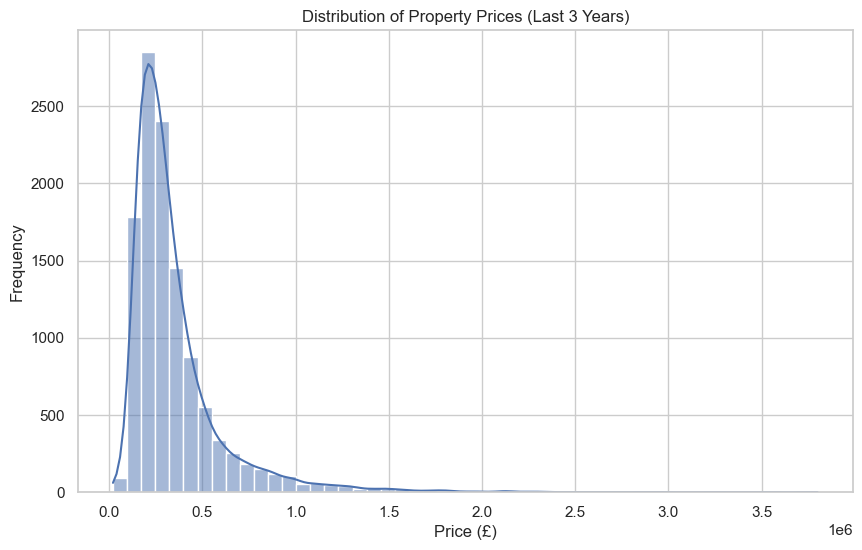

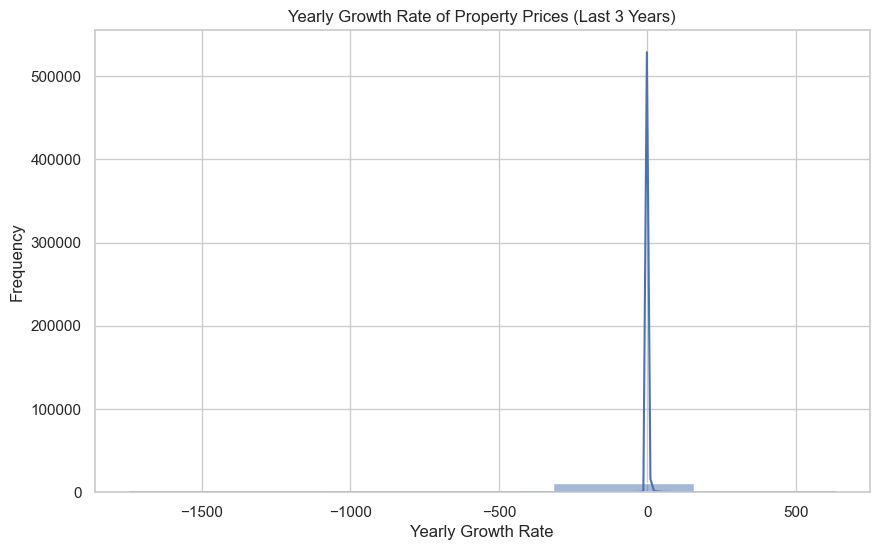

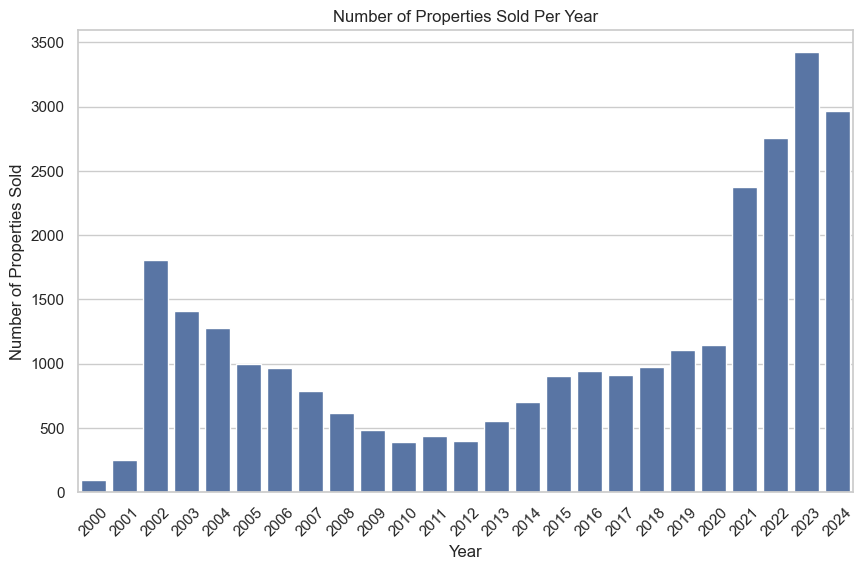

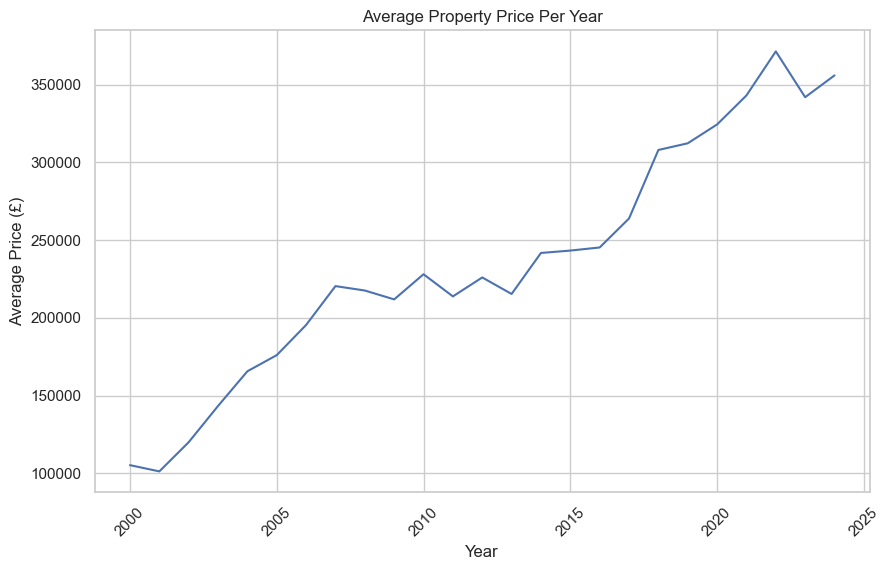

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Filter for the last 3 years
last_3_years = df[df['latest_year_sold'] >= (df['latest_year_sold'].max() - 3)]

# 1. Distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(last_3_years['latest_price'], bins=50, kde=True)
plt.title('Distribution of Property Prices (Last 3 Years)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

# 2. Yearly growth rate of property prices
plt.figure(figsize=(10, 6))
sns.histplot(last_3_years['yearly_growth'] * 100, bins=5, kde=True)
plt.title('Yearly Growth Rate of Property Prices (Last 3 Years)')
plt.xlabel('Yearly Growth Rate')
plt.ylabel('Frequency')
plt.show()

# 3. Number of properties sold per year
plt.figure(figsize=(10, 6))
properties_per_year = df['latest_year_sold'].value_counts().sort_index()
sns.barplot(x=properties_per_year.index, y=properties_per_year.values)
plt.title('Number of Properties Sold Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=45)
plt.show()

# 4. Average property price per year
plt.figure(figsize=(10, 6))
average_price_per_year = df.groupby('latest_year_sold')['latest_price'].mean()
sns.lineplot(x=average_price_per_year.index, y=average_price_per_year.values)
plt.title('Average Property Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.show()

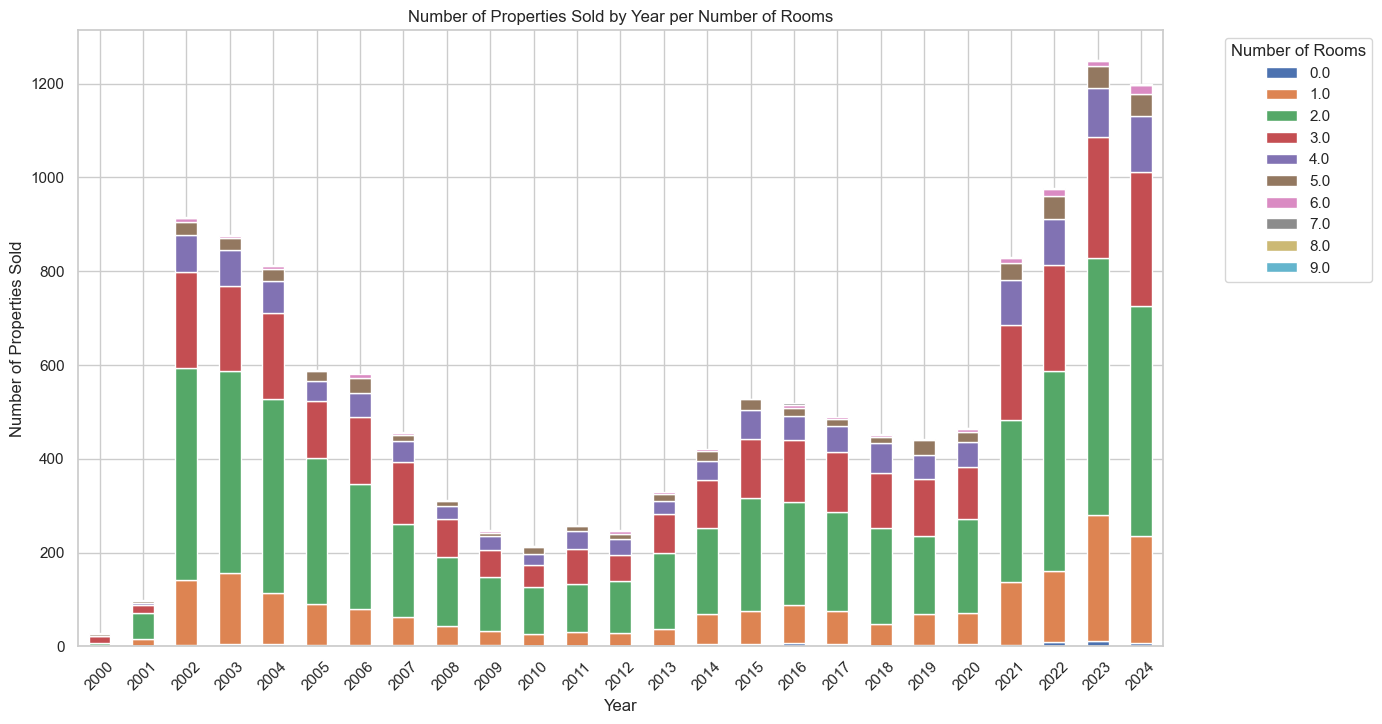

In [26]:
# Group by year and number of bedrooms, then count the number of properties sold
properties_sold_by_year_and_rooms = df.groupby(['latest_year_sold', 'bedrooms']).size().unstack(fill_value=0)

# Display the result
properties_sold_by_year_and_rooms
import matplotlib.pyplot as plt

# Plot the number of properties sold by year per number of rooms
properties_sold_by_year_and_rooms.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of Properties Sold by Year per Number of Rooms')
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.legend(title='Number of Rooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Filter the dataset for houses with more than a specified number of bedrooms
# min_bedrooms = 3
# filtered_df = df[df['bedrooms'] >= min_bedrooms]

# Group by clusters and calculate the average price and number of bedrooms
neighborhood_stats = df.groupby('cluster').agg({
  'latest_price': 'mean',
  'bedrooms': 'mean',
  'cluster_center_lat': 'first',
  'cluster_center_lng': 'first'
}).reset_index()

# Sort the neighborhoods by average price in ascending order
neighborhood_stats = neighborhood_stats.sort_values(by='latest_price')

# Display the top neighborhoods with the cheapest houses and many rooms
neighborhood_stats.head(10)

,cluster,latest_price,bedrooms,cluster_center_lat,cluster_center_lng
11,11,144430.361970,2.506061,55.970148,-3.249313
14,14,167101.196891,2.595376,55.932288,-3.132312
9,9,178762.242365,2.292683,55.955188,-3.143295
18,18,181681.276083,2.369838,55.974034,-3.228551
4,4,192995.420863,1.896587,55.966180,-3.166384
15,15,194348.022727,2.585280,55.917616,-3.158858
17,17,211489.843579,2.068323,55.931838,-3.236870
2,2,212943.927448,2.413043,55.937746,-3.253463
12,12,226873.893166,2.123457,55.976400,-3.184934
3,3,241107.380517,2.580519,55.949185,-3.119258


In [28]:
import folium

# Create a map centered around Edinburgh
map_center = [55.9533, -3.1883]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each cluster center
for idx, row in neighborhood_stats.iterrows():
  rounded_price = round(row['latest_price'], -4)
  formatted_price = f"£{rounded_price:,.0f}"
  folium.Marker(
    location=[row['cluster_center_lat'], row['cluster_center_lng']],
    popup=f"Cluster {row['cluster']}\nAvg Price: {formatted_price}\nAvg Bedrooms: {row['bedrooms']:.2f}",
    icon=folium.Icon(color='red', icon='info-sign')
  ).add_to(m)

# Display the map
m

In [29]:
import folium

def show_properties_in_cluster(df: pd.DataFrame, cluster: int, bedroom_count: int = None,  last_n_years: int = 3):
  # Filter the dataset for properties in the specified cluster sold in the last n years
  last_year = df['latest_year_sold'].max()
  cluster_properties = df[(df['cluster'] == cluster) & (df['latest_year_sold'] >= last_year - last_n_years)]
  if bedroom_count:
    cluster_properties = cluster_properties[cluster_properties['bedrooms'] == bedroom_count]

  # Create a map centered around the cluster center
  map_center = [cluster_properties['cluster_center_lat'].iloc[0], cluster_properties['cluster_center_lng'].iloc[0]]
  m = folium.Map(location=map_center, zoom_start=13)

  # Add markers for each property in the cluster
  for idx, row in cluster_properties.iterrows():
    folium.Marker(
      location=[row['location.lat'], row['location.lng']],
      popup=f"Address: {row['address']}<br>Price: £{row['latest_price']:,.0f}<br>Date Sold: {row['latest_date_sold'].date()}<br><br>Click for more details: <a href='{row['detailUrl']}' target='_blank'>Link</a>",
      icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

  # Display the map
  return cluster_properties, m

In [31]:
import seaborn as sns

import matplotlib.pyplot as plt

def yearly_plot_by_bedrooms(df: pd.DataFrame, aggregate_column: str = 'latest_price', outlier_threshold: float = None):
  # Group by year and bedrooms, then calculate the average price
  avg_price_per_bedroom = df[df['bedrooms'] < 5].groupby(['latest_year_sold', 'bedrooms', 'cluster'])[aggregate_column].mean().reset_index()
  # remove outliers
  if outlier_threshold:
    avg_price_per_bedroom = avg_price_per_bedroom[avg_price_per_bedroom[aggregate_column] > avg_price_per_bedroom[aggregate_column].quantile(outlier_threshold)]
    avg_price_per_bedroom = avg_price_per_bedroom[avg_price_per_bedroom[aggregate_column] < avg_price_per_bedroom[aggregate_column].quantile(1-outlier_threshold)]


  # Set the style for the plots
  sns.set(style="whitegrid")

  # Plot the data
  plt.figure(figsize=(14, 8))
  g = sns.FacetGrid(avg_price_per_bedroom, col="cluster", col_wrap=3, height=4)
  g.map(sns.lineplot, 'latest_year_sold', aggregate_column, 'bedrooms', marker='o')

  # g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
  # g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)


  # Set the title and labels
  plt.title('Average Yearly Price per Bedroom Count Over Time')
  plt.xlabel('Year')
  plt.ylabel('Average Price (£)')
  plt.legend(title='Bedrooms')
  plt.xticks(rotation=45)
  plt.ticklabel_format(style='plain', axis='y')

  plt.show()


<Figure size 1400x800 with 0 Axes>

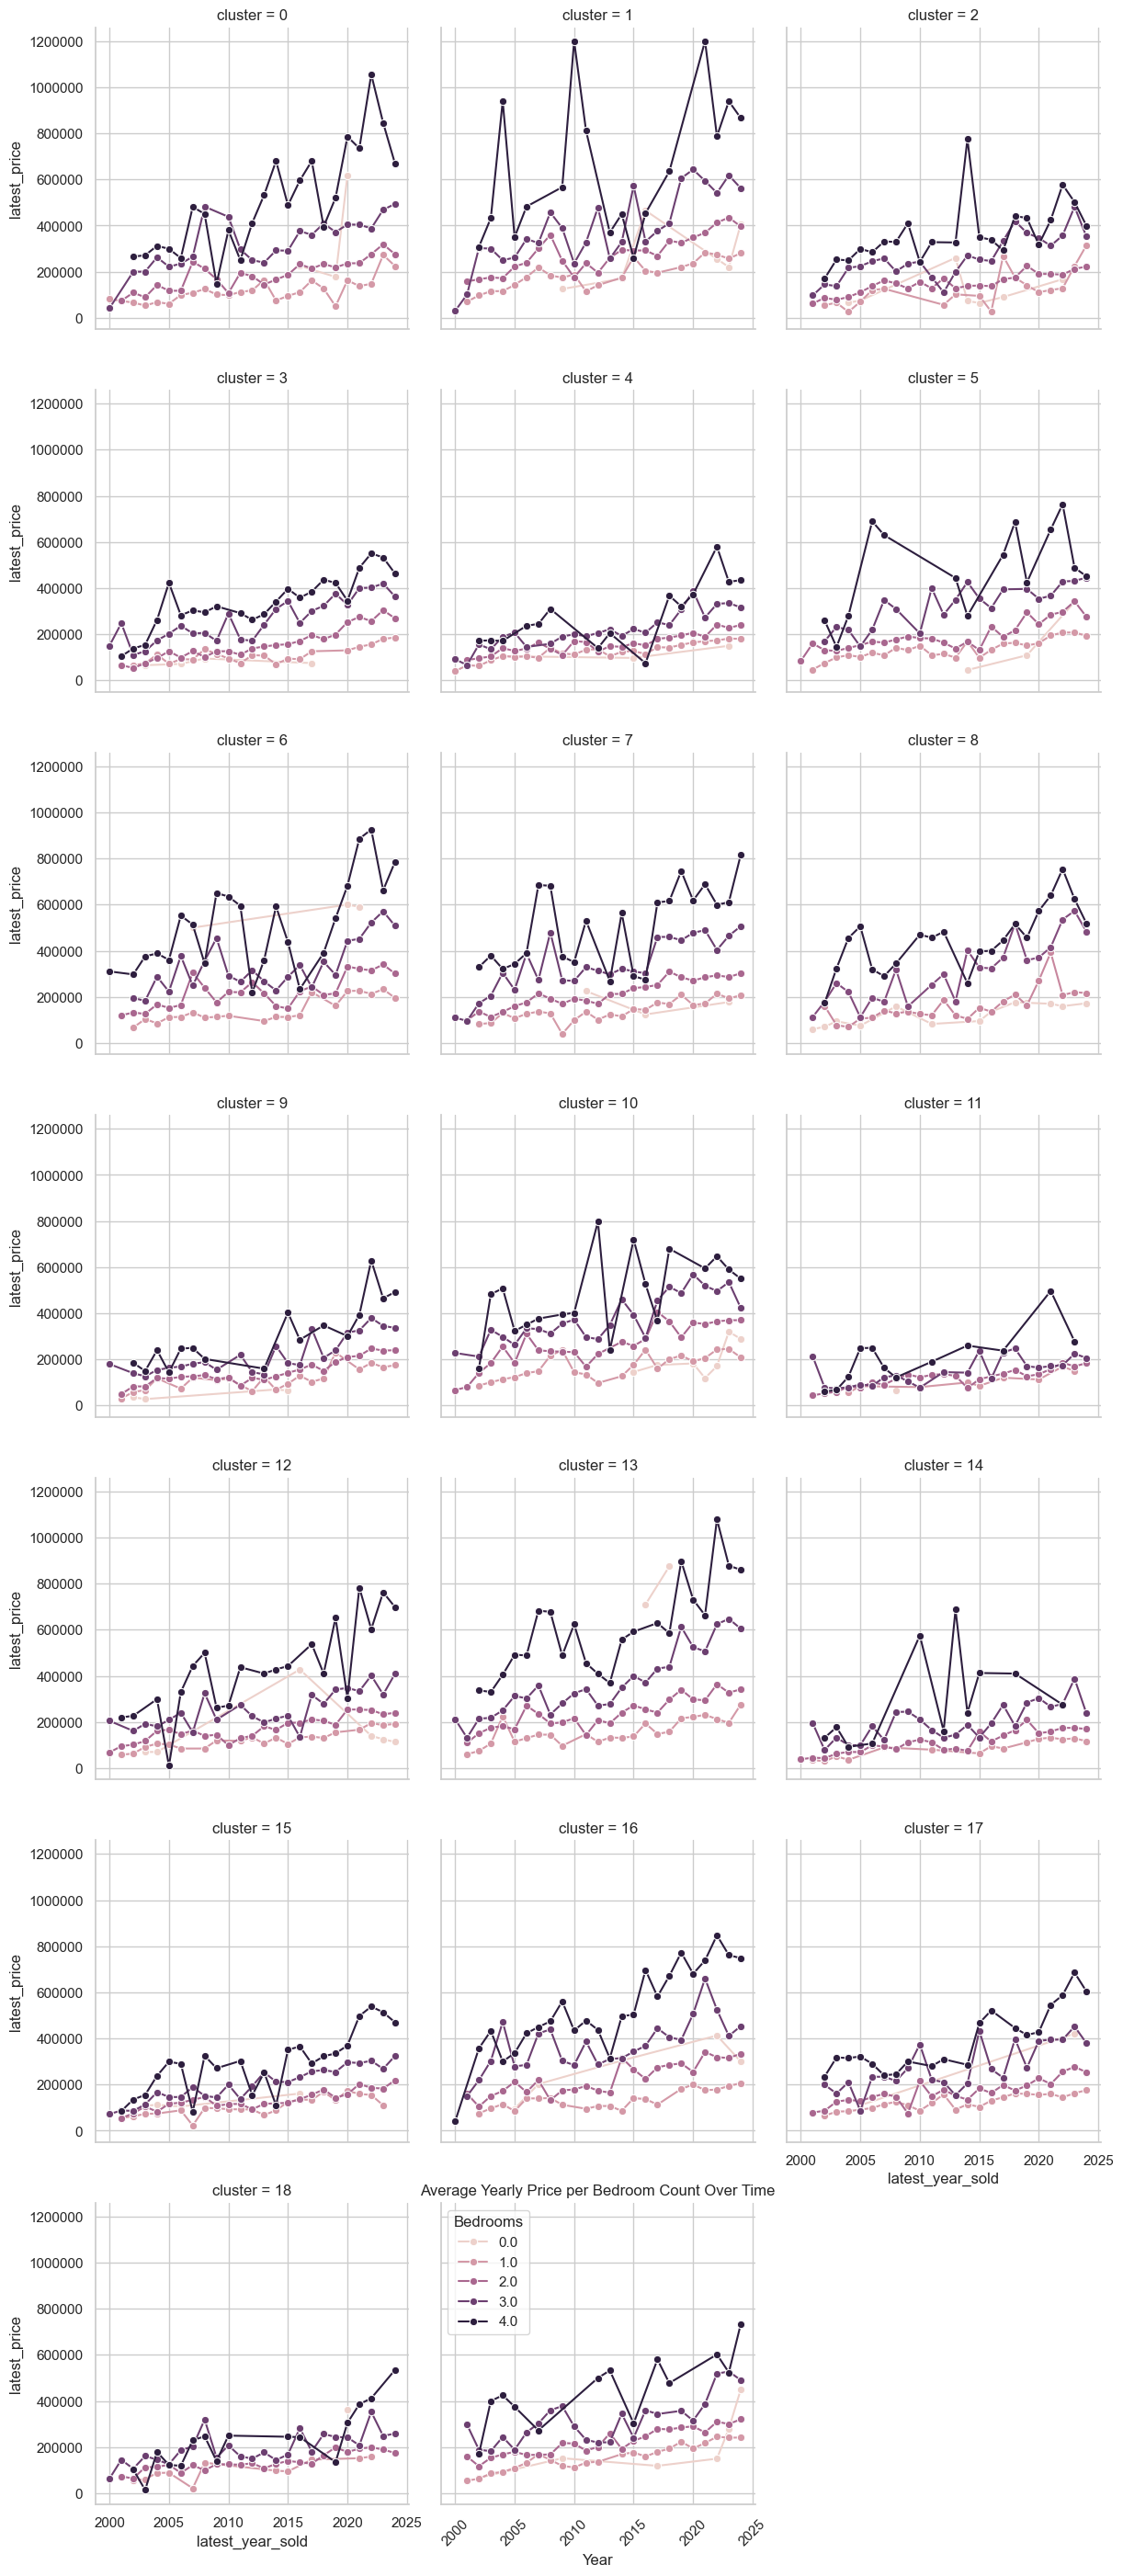

In [32]:
yearly_plot_by_bedrooms(df, 'latest_price',)


In [53]:
cluster = 0

df_cluster = df[df['hasFloorPlan'] == True]
# df_cluster = df_cluster[df_cluster['latest_price'] < 850_000]

df_cluster, m = show_properties_in_cluster(df_cluster, cluster, 4, 4)

df_cluster.head()

m